Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64


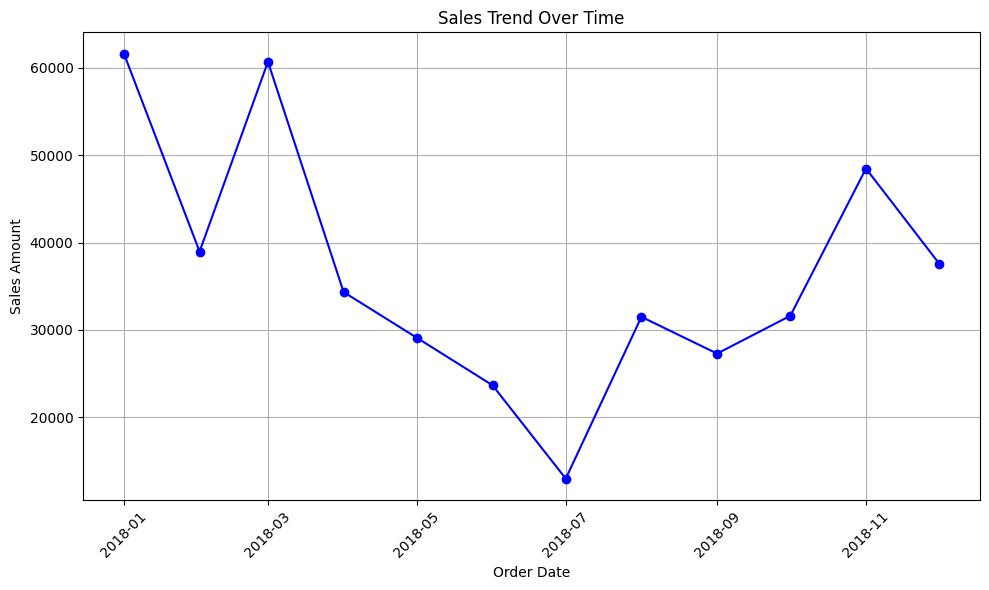

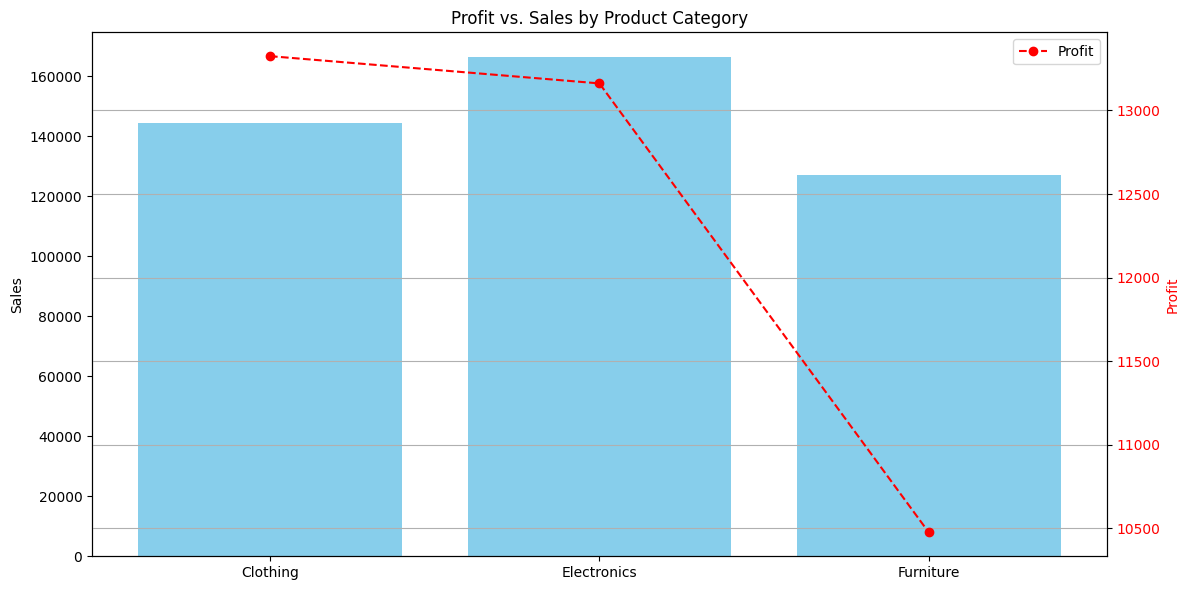

<Figure size 1200x600 with 0 Axes>

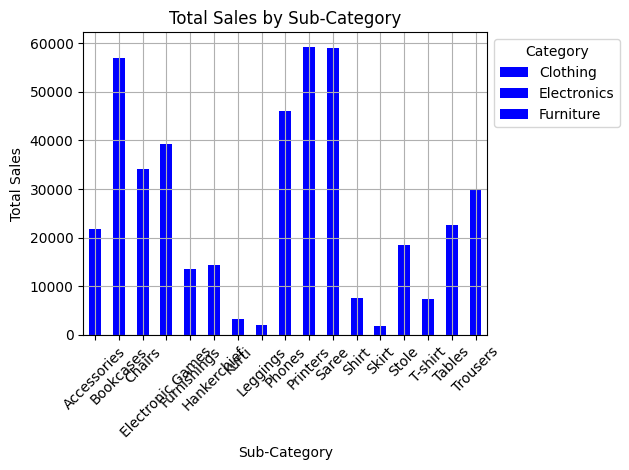

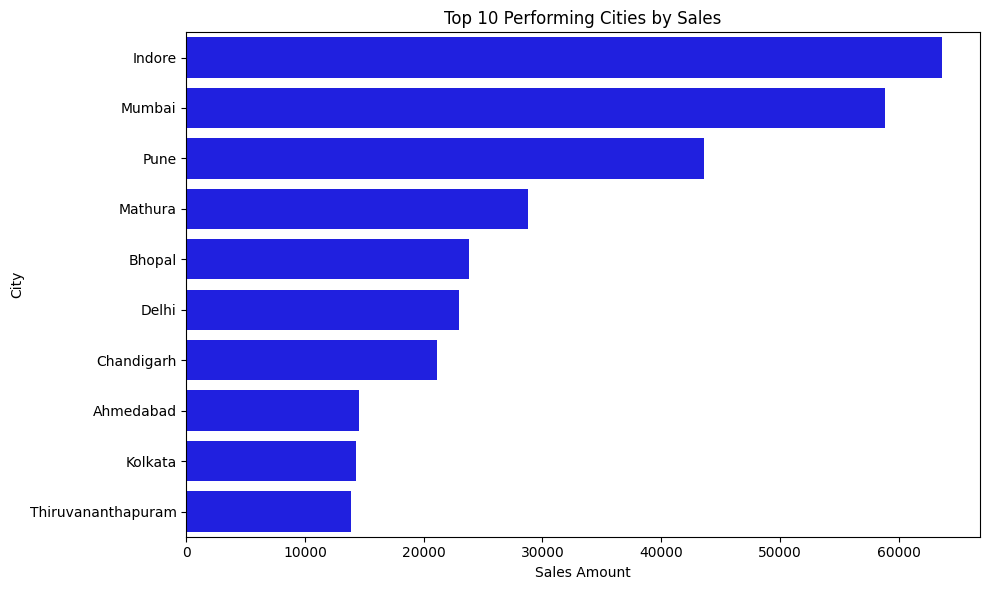

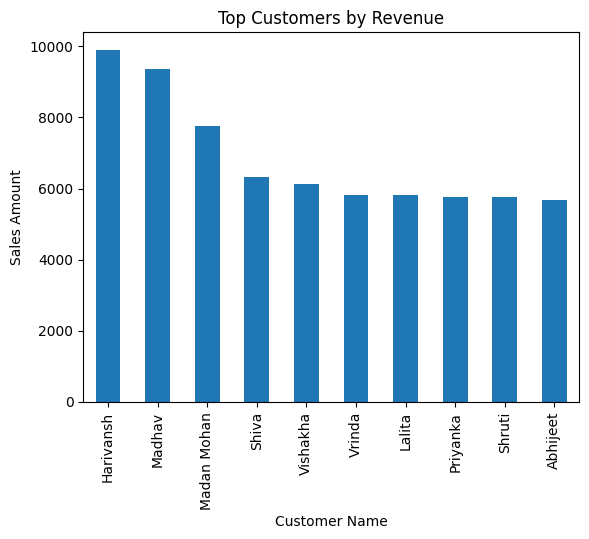

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
orders_df = pd.read_csv('/content/Orders.csv')
details_df = pd.read_csv('/content/Details.csv')

# Merge the datasets on 'Order ID'
merged_df = pd.merge(orders_df, details_df, on='Order ID')

# Convert 'Order Date' to datetime format
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%d-%m-%Y') # Changed line to specify date format

# Check for missing values
print(merged_df.isnull().sum())

# Group data by year and month for time-series analysis
merged_df['Year-Month'] = merged_df['Order Date'].dt.to_period('M')

# Aggregate data for sales trend, profit, etc.
sales_trend = merged_df.groupby('Year-Month')['Amount'].sum().reset_index()
category_profit = merged_df.groupby('Category')[['Amount', 'Profit']].sum().reset_index()
sub_category_sales = merged_df.groupby('Sub-Category')['Amount'].sum().reset_index()
city_sales = merged_df.groupby('City')['Amount'].sum().reset_index()
customer_sales = merged_df.groupby('CustomerName')['Amount'].sum().reset_index()


#1.
# Convert 'Order Date' to datetime format
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%d-%m-%Y')

# Group sales by month
sales_trend = merged_df.groupby(merged_df['Order Date'].dt.to_period('M')).agg({'Amount': 'sum'}).reset_index()
sales_trend['Order Date'] = sales_trend['Order Date'].dt.to_timestamp()

# Plot the sales trend
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Order Date'], sales_trend['Amount'], marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2.
# Group data by Category and calculate profit and sales
category_data = merged_df.groupby('Category')[['Profit', 'Amount']].sum()

# Create the combo chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for sales
ax1.bar(category_data.index, category_data['Amount'], color='skyblue', label='Sales')
plt.ylabel('Sales')

# Secondary y-axis for profit (optional)
ax2 = ax1.twinx()
ax2.plot(category_data.index, category_data['Profit'], marker='o', linestyle='--', color='red', label='Profit')
plt.ylabel('Profit', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Customize the chart
plt.title('Profit vs. Sales by Product Category')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#3
# Group data by sub-category and calculate total sales
sub_category_sales = merged_df.groupby(['Category', 'Sub-Category'])['Amount'].sum().reset_index()

# Pivot the table to create a DataFrame with categories as columns
category_sales = sub_category_sales.pivot(index='Sub-Category', columns='Category', values='Amount').fillna(0)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', stacked=True, color='blue')
plt.ylabel('Total Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.title('Total Sales by Sub-Category')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position if needed
plt.grid(True)
plt.tight_layout()
plt.show()

#4.
# Group data by city and sum the sales
top_cities = merged_df.groupby('City')['Amount'].sum().nlargest(10).reset_index()

# Plot top cities by sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Amount', y='City', data=top_cities, color='blue')
plt.title('Top 10 Performing Cities by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# 5. Top Customers by Revenue
top_customers = merged_df.groupby('CustomerName')['Amount'].sum().nlargest(10)
top_customers.plot(kind='bar', title='Top Customers by Revenue', ylabel='Sales Amount', xlabel='Customer Name')
plt.show()